# Proyek Analisis Data:  E-Commerce Public Dataset
- **Nama:**  A.Muh.Bintang Palinrungi
- **Email:** andibintang2503@gmail.com
- **ID Dicoding:** A.Muh.Bintang Palinrungi

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki customer paling banyak dan paling sedikit ?
- Berapa rata-rata reviews score pada setiap tahun ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Menghubungkan notebook dengan google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Menginput data customers_df

In [3]:
customers_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Menginput data order_reviews_df

In [4]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

**Melihat info data customers_df**

---
- Terdapat 4 tipe data object dan 1 tipe data integer
- Tidak memiliki missing value




In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Mengecek duplikasi data customers_df**

---


- Tidak terdapat duplikasi




In [6]:
print('Jumlah duplikasi : ', customers_df.duplicated().sum())

Jumlah duplikasi :  0


**Melihat info data order_reviews_df**

---
- Terdapat Missing value
- Terdapat kesalahan tipe data


In [7]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Mengecek duplikasi data order_reviews_df**

---
- tidak terdapat duplikasi


In [8]:
print('Jumlah duplikasi : ', order_reviews_df.duplicated().sum())

Jumlah duplikasi :  0


Melihat detail data order_reviews_df

---

- Tidak terdapat keanehan

In [9]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Cleaning Data

**Cleaning data customers_df**

---

- Clear ( tidak ada masalah )

In [10]:
# Data customers_df clear (tidak ada masalah)

**Cleaning data order_reviews_df**

**Melihat total missing value pada data order_reviews_df**

---

- Terdapat 87656 missing value pada kolom review_comment_title
- Terdapat 58247 missing value pada kolom review_comment_message

In [11]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengisi missing value pada kolom review_comment_title dengan " No comment title "

In [12]:
order_reviews_df.review_comment_title.fillna(value = 'No comment title', inplace = True)

Cek perubahan missing value

---
- missing value pada kolom review_comment_title telah terisi


In [13]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title           0
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengisi missing value pada kolom review_comment_message dengan " No comment message "

In [14]:
order_reviews_df.review_comment_message.fillna(value = 'No comment message', inplace = True)

Cek perubahan missing value

---
- Missing value pada kolom review_comment_message telah terisi


In [15]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Mengubah tipe data kolom review_creation_date dan review_answer_timestamp dati object ke datetinme

In [16]:
datetime_column = ['review_creation_date', 'review_answer_timestamp']
for column in datetime_column :
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

**Cek perubahan tipe data**

---
- tipe data kolom 'review_creation_date' dan 'review_answer_time stamp' telah beubah menjadi datetime


In [17]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

**Explore data customers_df**

**Mengelompokkan data customer_df berdasarkan customer_city**

---
- Menunjukkan kota dengan customer paling banyak dan paling sedikit


In [18]:
customers_df.groupby(by = 'customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Melihat 5 kota dengan customer terbanyak**

---
- Kota dengan customer terbnyak yaitu kota Sao Paulo sebanyak 15540 customer dan disusul oleh kota Rio De Janeiro dengan 6882 customer


In [19]:
top_5_city = customers_df.groupby(by = 'customer_city').customer_id.nunique().sort_values(ascending=False).reset_index().head(5)
print(top_5_city)

    customer_city  customer_id
0       sao paulo        15540
1  rio de janeiro         6882
2  belo horizonte         2773
3        brasilia         2131
4        curitiba         1521


**Melihat 5 kota dengan customer paling sedikit**

---
- Ternyata ada banyak kota yg hanya memiliki 1 customer


In [20]:
customers_df.groupby(by = 'customer_city').customer_id.nunique().sort_values(ascending=True).reset_index().head(5)

,customer_city,customer_id
0,lagoao,1
1,pedro gomes,1
2,caraibas,1
3,japoata,1
4,pedro velho,1


**Melihat total kota yang memiliki 1 cusomer**

---
- Terdapat 1144 kota yang memiliki 1 customer


In [21]:
city_1_customer = customers_df.groupby(by = 'customer_city').customer_id.nunique().sort_values(ascending=True).reset_index()
city_1_customer = city_1_customer[city_1_customer['customer_id'] == 1].sum()
print(city_1_customer)

customer_city    lagoaopedro gomescaraibasjapoatapedro velhopei...
customer_id                                                   1144
dtype: object


**Menghitung ada berapa macam kota pada kolom customer_city**

---
- Total ada 4119 kota


In [22]:
total_city = customers_df['customer_city'].nunique()
print(f'jumlah kota : {total_city}')

jumlah kota : 4119


**Eksplore data order_reviews_df**

**Melihat tahun terkecil pada kolom 'review_creation_date'**

---
- 2016 nerupakan tahun terkecil


In [23]:
order_reviews_df['review_creation_date'].dt.year.min()

2016

**Melihat tahun terbesar pada kolom 'review_creation_date'**

---
- 2018 nerupakan tahun terbesar


In [24]:
order_reviews_df['review_creation_date'].dt.year.max()

2018

**Mengelompokkan berdasarkan tahun dan menghitung rata-ratanya**

---
- Tahun 2016 rata-rata score review sebesar 3.55
- Tahun 2017 rata-rata score review sebesar 4.10
- Tahun 2018 rata-rata score review sebesar 4.07


In [25]:
average_per_year = order_reviews_df.groupby(order_reviews_df['review_creation_date'].dt.year)['review_score'].mean()
print(average_per_year)

review_creation_date
2016    3.550769
2017    4.109489
2018    4.071968
Name: review_score, dtype: float64


**Menggabungkan data customers_df dengan order_reviews_df **

---
- digabung kedalam all_df
- Menampilkan semua kolom yang ada dalam kedua data


In [26]:
all_df = pd.merge(
    left = customers_df,
    right = order_reviews_df,
    how = 'outer',
    left_index = True,
    right_index= True,

)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,No comment title,No comment message,2018-01-18,2018-01-18 21:46:59
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,No comment title,No comment message,2018-03-10,2018-03-11 03:05:13
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,No comment title,No comment message,2018-02-17,2018-02-18 14:36:24
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,No comment title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,No comment title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Kota dengan customer terbanyak**

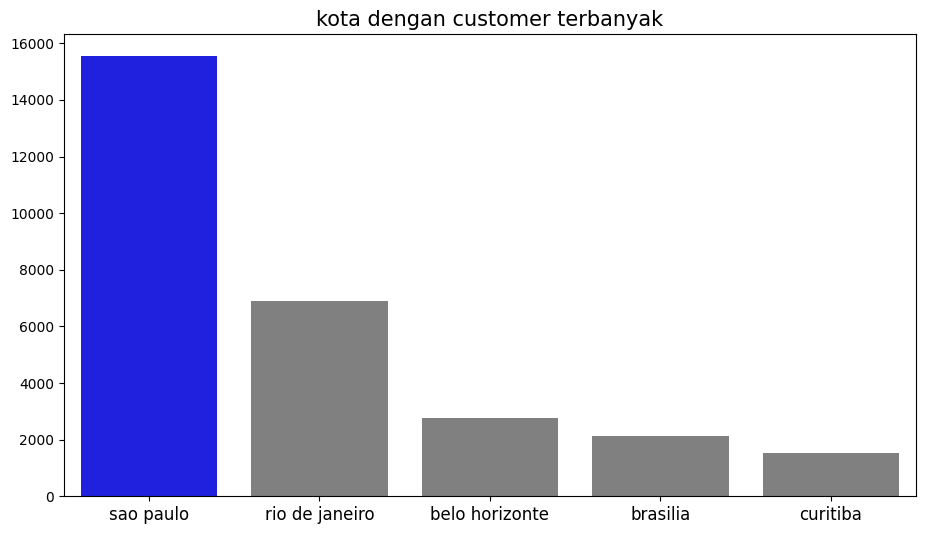

In [27]:
colors = ['blue','grey','grey','grey','grey']
top_5_city.rename(columns={
    'customer_id' : 'customer_count'
}, inplace=True)

plt.figure(figsize=(11,6))
sns.barplot(
    x='customer_city',
    y='customer_count',
    data=top_5_city.sort_values(by='customer_count', ascending=False),
    hue='customer_city',
    palette=colors
)

plt.title('kota dengan customer terbanyak', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


 **Kota dengan customer paling sedikit**
- **27.74%** dari **4419 total** kota merupakan kota yang hanya memiliki 1 customer.Hal ini menununjukkan bahwa terdapat **1144 kota** dengan 1 customer



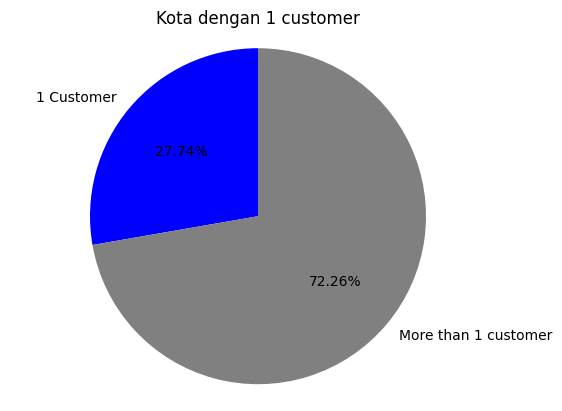

In [28]:
colors=['blue','grey']
labels = ['1 Customer', 'More than 1 customer']
sizes = [27.74 , 100 - 27.74]
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title('Kota dengan 1 customer')
plt.axis('equal')
plt.show()

### Pertanyaan 2:

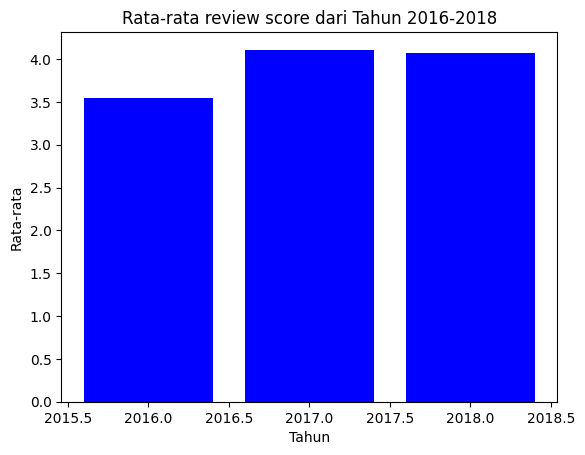

In [29]:
plt.bar(average_per_year.index, average_per_year.values, color=['blue', 'blue', 'blue'])
plt.xlabel('Tahun')
plt.ylabel('Rata-rata')
plt.title('Rata-rata review score dari Tahun 2016-2018')

plt.show()

## Conclusion

**Pertanyaan 1**

---


- Dari data yang telah dianalisis terlihat jelas bahwa kota yang secara signifikan berkontribusi terhadap customer terbanyak.Khususnya kota **Sao Paulo** sebanyak **15540** customer.Kemudian disusul oleh kota **Rio De Janeiro** sebanyak **6882** customer.

- Terdapat **1144** kota di dalam dataset kami yang menarik perhatian karena hanya memiliki satu pelanggan.Hal ini menjadikan kota-kota tersebut menjadi kota dengan customer paling sedikit yang hanya memiliki 1 customer. keberadaan mereka menciptakan jejak eksklusif dalam layanan kami, menandakan keunikan dan keberagaman pengguna di seluruh kota-kota tersebut.

**Pertanyaan 2**

---
- Dengan memeriksa rata-rata per tahun, dapat disimpulkan bahwa skor cenderung stabil dari tahun ke tahun. Ini menunjukkan konsistensi dalam kualitas layanan atau produk selama periode waktu yang dianalisis.


In [30]:
all_df.to_csv('all_data.csv', index=False)